<a href="https://colab.research.google.com/github/BloodyFace555666/ZSU/blob/main/fml_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Machine Learning - Exercise 1
The aim of the exercise is to get an overview of the basic capabilities of the Pandas, Matplotlib and Seaborn libraries and be able to setup a Python Virtual Enviroment (`venv`)

**Jupyter lab**

* Add code
* Add text
* Execute command
* Shortcuts (a, b, dd, Ctrl+Enter, Shift+Enter, x, c, v)

**Alternatives**

* Google Colab ([Colaboratory](https://colab.research.google.com/))
* Python scripts in VS Code

"![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_01_meme_01.png?raw=true)

In [2]:
import time
print(time.ctime())

Tue Sep 23 19:59:19 2025


# Data processing

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [3]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## The first step is to load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [4]:
df_full = pd.read_csv("https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv")
df_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_full   #vypise obsah z premennej

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## We shloud take a look on the data after loading so we know that everything is OK

### We will start with showing first/last N rows
- There are several ways of doing that:
    - name of the dataframe
    - head()
    - tail()

### Show 5 first and last rows

In [6]:
df_full.head(5)     #default je 5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Show first 5 rows

### Show last 20 rows

In [7]:
df_full.tail(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


## If we want to know if there are any missing values, the isna() function may render useful

In [8]:
df_full.isna().sum().sort_values(ascending=False).head(20)    #isna vracia true tam kde je NaN, sum ich spocita

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


## We can show summary of common statistical characteristic of the data using the describe() function

In [9]:
df_full.describe()

#std - standardna odchylka
#50% - median

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 💡 Dataframe has several useful properties
    - shape
    - dtypes
    - columns
    - index

#### Row and column count

In [10]:
df_full.shape   #(riadky, stlpce)

(1460, 81)

#### Datatypes of columns

In [11]:
df_full.dtypes

#object predstavuje string

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


#### Column names

In [12]:
df_full.columns

#vrati list nazvov stlpcov

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Row index values

In [13]:
list(df_full.index) [:5]   #vrati iterator, ktorym mozeme prechadzat, [:5] zobrazi prvych 5 hodnot

[0, 1, 2, 3, 4]

## We may want to work with just one column not the whole dataframe
- We will select only the SalePrice columns and save it to another variable

In [14]:
sale_price = df_full.SalePrice     #nazov atributu
sale_price

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


## Columns are called Pandas Series - it shares a common API with Pandas DataFrame
- 💡 Pandas is numpy-backed so we can use Series as standard numpy arrays without any issues using the .values property

In [15]:
sale_price.values     #vrati pole hodnot

#pandas dataframe - 2d data
#pandas series - iba jeden stlpec

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

## Find maximum price using Numpy and Pandas

In [16]:
np.max(sale_price.values)     #asi dateframe

np.int64(755000)

In [17]:
sale_price.max()    #panda series

755000

In [18]:
max(sale_price)     #min z pyhtonu

#rovnake je to aj pre minimum

755000

## Data filtering using Pandas DataFrame
- There are several ways of filtering the data (similar logic to .Where() in C# or WHERE in SQL)
- 💡 We usually work with two indexers - .loc[] and .iloc[]

### The .iloc[] indexer works with positional indexes - very close to the way of working with the raw arrays
### The .loc[] indexer works with column names and logical expressions

### Select all rows and 3rd column of dataframe

In [19]:
df_full.iloc[:, 2]    #chceme index, pouzijeme iloc; [index riadka, index stlpca]; : znamena vsetky

,MSZoning
0,RL
1,RL
2,RL
3,RL
4,RL
...,...
1455,RL
1456,RL
1457,RL
1458,RL


### Select all rows and LAST column of dataframe

In [20]:
df_full.iloc[:, -1]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


### Select 4th to 10th row and all columns

In [21]:
df_full.iloc[3:10, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Select 2nd to 13th row and 3rd column

In [22]:
df_full.iloc[1:13, 2]

,MSZoning
1,RL
2,RL
3,RL
4,RL
5,RL
6,RL
7,RL
8,RM
9,RL
10,RL


## Select only a subset of columns to a new dataframe
* 'Id', 'SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr'

In [23]:
df = df_full.loc[:, ['Id', 'SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']].copy()      #vyberie vsetky riadky a vybrane stlpce; funkcia copy - do premennej df ukladam iba referenciu, inac by sa mohlo stat ze by sa data prepisali
df.head()

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4


### Select only houses built in year 2000 or later
* YearBuilt

In [24]:
df.loc[df.YearBuilt > 2000, :]

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3
6,7,307000,20,1Fam,1Story,8,5,2004,GasA,Y,1694,3
11,12,345000,60,1Fam,2Story,9,5,2005,GasA,Y,2324,4
13,14,279500,20,1Fam,1Story,7,5,2006,GasA,Y,1494,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1445,179600,20,1Fam,1Story,7,5,2004,GasA,Y,1422,3
1451,1452,287090,20,1Fam,1Story,8,5,2008,GasA,Y,1578,3
1452,1453,145000,180,TwnhsE,SLvl,5,5,2005,GasA,Y,1072,2
1453,1454,84500,20,1Fam,1Story,5,5,2006,GasA,Y,1140,3


### Select only houses that don't use GasA for heating (!= or ~ operators)
* Heating

In [25]:
df.loc[df.Heating != 'GasA', :]     #loc vybera riadky ktore nepouzivaju dane vytapanie a vsetky stlpce

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
69,70,225000,50,1Fam,1.5Fin,7,4,1953,GasW,Y,2287,3
93,94,133900,190,2fmCon,2.5Unf,6,6,1910,GasW,N,2291,4
108,109,115000,50,1Fam,1.5Fin,5,7,1919,GasW,N,1517,3
155,156,79000,50,1Fam,1.5Fin,6,5,1924,Grav,N,1096,2
275,276,205000,50,1Fam,1.5Fin,7,7,1925,GasW,N,1548,3
313,314,375000,20,1Fam,1Story,7,5,1965,GasW,Y,2036,3
342,343,87500,90,Duplex,1Story,3,4,1949,Wall,N,1040,2
417,418,239000,70,1Fam,2Story,6,6,1918,GasW,N,2624,4
514,515,96500,45,1Fam,1.5Unf,5,5,1926,Grav,N,789,2
636,637,60000,30,1Fam,1Story,2,3,1936,Grav,N,800,1


### Select houses cheaper than 180k USD and with at least 2 bedrooms
* SalePrice, BedroomAbvGr

In [26]:
df.loc[(df.SalePrice <= 180000) & (df.BedroomAbvGr >=2), :]     #jednotlive vyrazy musia byt v zatvorkach

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
8,9,129900,50,1Fam,1.5Fin,7,5,1931,GasA,Y,1774,2
9,10,118000,190,2fmCon,1.5Unf,5,6,1939,GasA,Y,1077,2
10,11,129500,20,1Fam,1Story,5,5,1965,GasA,Y,1040,3
12,13,144000,20,1Fam,1Story,5,6,1962,GasA,Y,912,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,145000,180,TwnhsE,SLvl,5,5,2005,GasA,Y,1072,2
1453,1454,84500,20,1Fam,1Story,5,5,2006,GasA,Y,1140,3
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2


### Select houses with 2 stories or air conditioning
* HouseStyle, CentralAir

In [27]:
df.loc[(df.HouseStyle == '2Story') | (df.CentralAir == 'Y'), :]

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2


# We can add new columns to the DataFrame as well

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_01_meme_02.png?raw=true)

### Add a new column named Age for each house (current year - year built)
* YearBuilt

In [28]:
import time
current_year = time.localtime().tm_year      #ziska aktualny rok

In [29]:
df['Age'] = current_year - df.YearBuilt
df

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Age
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,22
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,49
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,24
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,110
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3,26
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3,47
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4,84
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2,75


### Add a new column IsLuxury with True value for houses with more than 3 bedrooms and price above 214k USD (.loc)
- How many luxury houses are in the dataset?
- SalePrice, BedroomAbvGr

In [30]:
df['IsLuxury'] = (df.SalePrice > 214000) & (df.BedroomAbvGr > 3)
df

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Age,IsLuxury
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,22,False
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,49,False
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,24,False
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,110,False
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,25,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3,26,False
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3,47,False
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4,84,True
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2,75,False


In [43]:
df.loc[df.IsLuxury == True, :]      #pocet luxusnych domov - moje riesenie
df.loc[df.IsLuxury, 'Id'].count()   #alebo takto - naprv zotriedime podla id a potom zratame

np.int64(96)

## Pandas enables us to use aggregation functions for the data using the .groupby() function

### Compute counts for all the heating methods (groupby / value_counts)
* Heating

In [32]:
df.Heating.value_counts()

,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


In [33]:
df.groupby('Heating').Heating.count().sort_values(ascending=False)      #groupby vracia vysledok agregacnej funkcie, musime na to zavolat count

,Heating
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


# Visualization

## Scatter plot
- Visualize relationship between SalePrice and GrLivArea.
- Use scatter plot from **Matplotlib**.

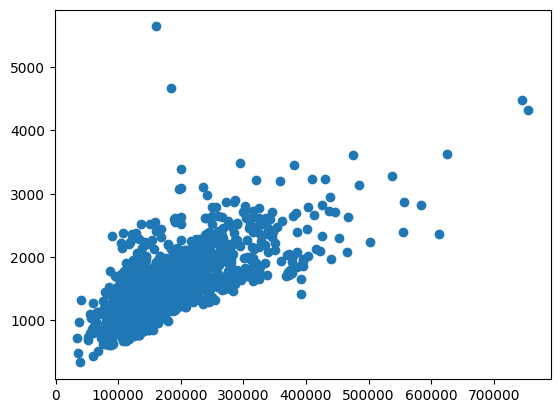

In [34]:
plt.scatter(df.SalePrice, df.GrLivArea)     #zobrazi zavislost ceny a priestoru, cim vyssia rozloha, tym vyssia cena

### Modify figure size and add title

Text(0.5, 1.0, 'Relationship between sale price and ground living area')

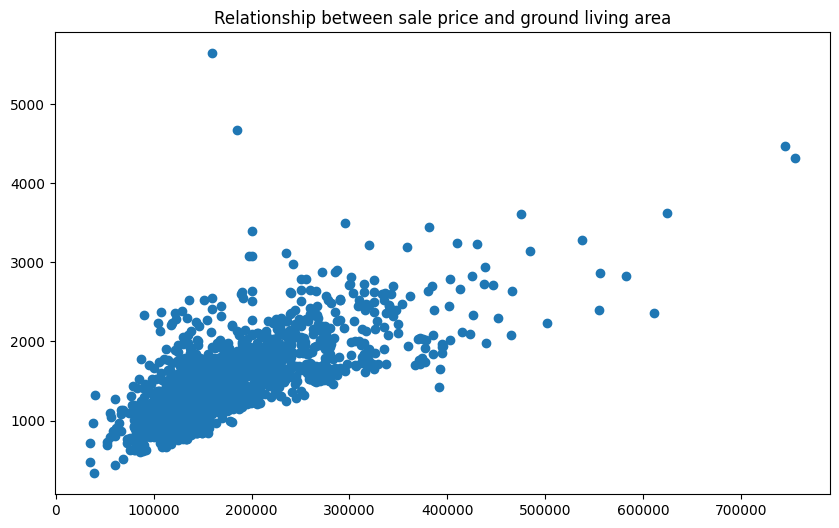

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df.SalePrice, df.GrLivArea)
plt.title('Relationship between sale price and ground living area')

### Add axis labels

Text(0, 0.5, 'Ground living area ($ft^2$)')

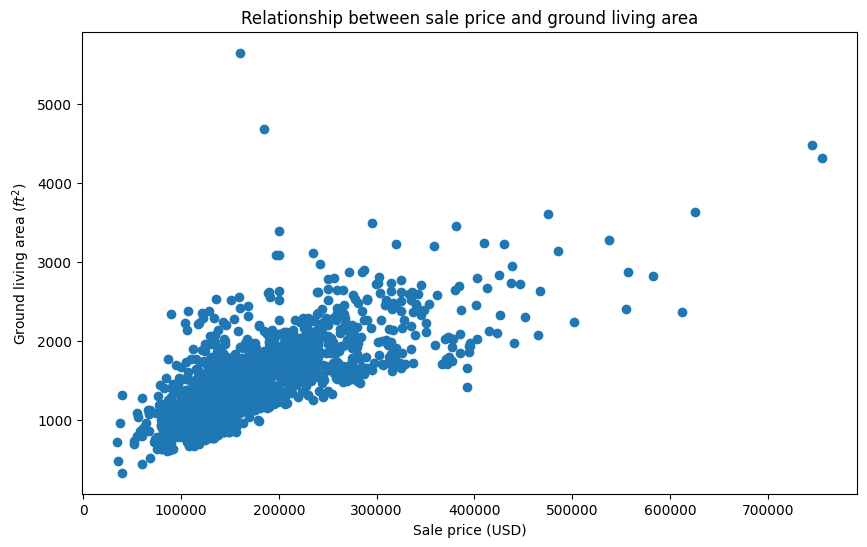

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df.SalePrice, df.GrLivArea)
plt.title('Relationship between sale price and ground living area')

#pridane nazvy os
plt.xlabel('Sale price (USD)')
plt.ylabel('Ground living area ($ft^2$)')

### Add colors for data points based on CentralAir value.

Text(0, 0.5, 'Ground living area ($ft^2$)')

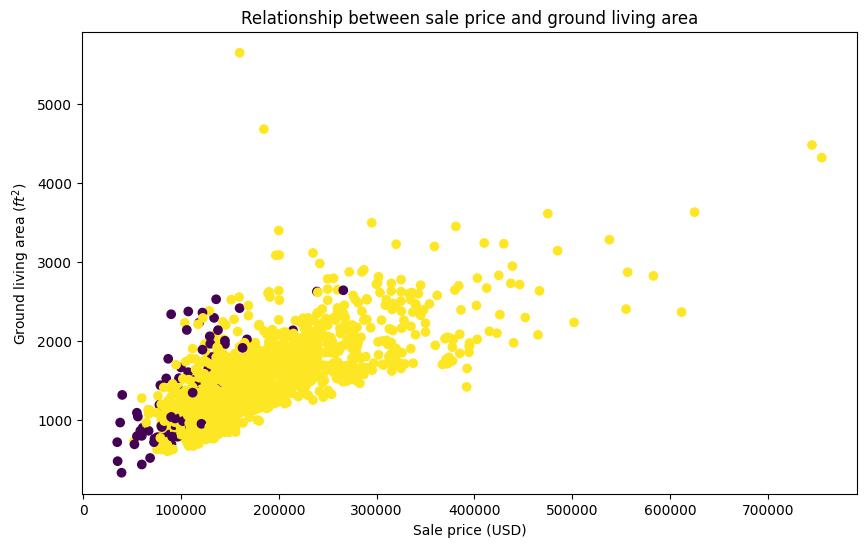

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df.SalePrice, df.GrLivArea,         c=df.CentralAir == 'Y')   #pridana farba
plt.title('Relationship between sale price and ground living area')
plt.xlabel('Sale price (USD)')
plt.ylabel('Ground living area ($ft^2$)')

## Try to use scatterplot from **Seaborn** library for scatter plot visualization.

#### Use dataframe as source and column names for axes data

### Resize plot and add color for markers based on CentralAir column

## Line plot
- Calculate and vizualize average house price in relationship to YearBuild.

## Bar plot
- Calculate and vizualize how many of houses have CentralAir
- Use Barplot for visualization

### Vizualize number of building type and if they contains air conditioning using Seaborn

# Tasks
## ✅ Pandas (1 pt)
* Add a new column *Undervalued* which is set to True in case that the house is priced bellow 163k USD and has both OverallQual and OverallCond higher than 5.

* **How many undervalued houses are in the dataset?**

## ✅ Vizualization (1 pt)
* Add to dataframe new attribute determining if the house was build before or after year 2000.

* **Create bar chart for number of houses depending on type of dwelling (attribute BldgType, use as a category axis) and added binary attribute about house age (use as a bar color).**

In [38]:
df

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Age,IsLuxury
0,1,208500,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,22,False
1,2,181500,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,49,False
2,3,223500,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,24,False
3,4,140000,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,110,False
4,5,250000,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,25,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60,1Fam,2Story,6,5,1999,GasA,Y,1647,3,26,False
1456,1457,210000,20,1Fam,1Story,6,6,1978,GasA,Y,2073,3,47,False
1457,1458,266500,70,1Fam,2Story,7,9,1941,GasA,Y,2340,4,84,True
1458,1459,142125,20,1Fam,1Story,5,6,1950,GasA,Y,1078,2,75,False


In [45]:
# Task 1
df['Undervalued'] = (df.SalePrice < 163000) & (df.OverallQual > 5) & (df.OverallCond > 5)
#df.loc[df.Undervalued == True, :]
df.loc[df.Undervalued, 'Id'].count()

,Id,SalePrice,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Age,IsLuxury,Undervalued
15,16,132000,45,1Fam,1.5Unf,7,8,1929,GasA,Y,854,2,96,False,True
16,17,149000,20,1Fam,1Story,6,7,1970,GasA,Y,1004,2,55,False,True
21,22,139400,45,1Fam,1.5Unf,7,7,1930,GasA,Y,1108,3,95,False,True
51,52,114500,50,1Fam,1.5Fin,6,6,1934,GasA,Y,1176,3,91,False,True
63,64,140000,70,1Fam,2Story,7,6,1921,GasA,Y,1710,3,104,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1412,140000,50,1Fam,1.5Fin,6,8,1950,GasA,Y,1668,3,75,False,True
1425,1426,142000,20,1Fam,1Story,6,6,1959,GasA,Y,1252,3,66,False,True
1431,1432,143750,120,TwnhsE,1Story,6,6,1976,GasA,Y,958,2,49,False,True
1438,1439,149700,20,1Fam,1Story,6,7,1957,GasA,Y,1236,2,68,False,True


In [94]:
# Task 2
df['BuiltBefore2000'] = df.YearBuilt < 2000
#df.head(10)

before2000 = df.loc[df.BuiltBefore2000 == True, :].BldgType.value_counts()
before2000

,count
BldgType,
1Fam,912
Duplex,52
TwnhsE,48
2fmCon,31
Twnhs,29


In [95]:
df['BuiltBefore2000'] = df.YearBuilt >= 2000
#df.head(10)

after2000 = df.loc[df.BuiltBefore2000 == True, :].BldgType.value_counts()
after2000

,count
BldgType,
1Fam,308
TwnhsE,66
Twnhs,14


Text(0, 0.5, 'Number of houses')

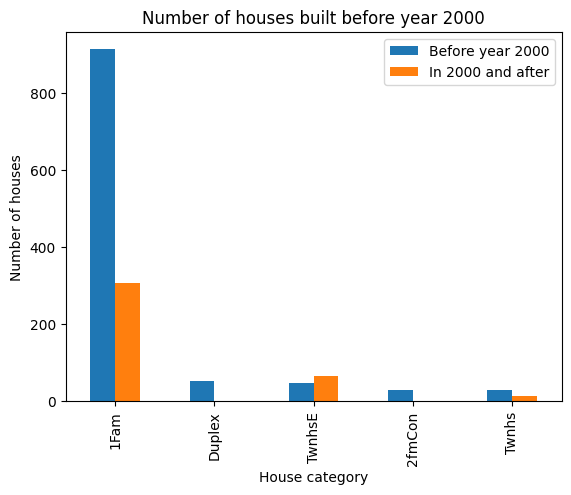

In [107]:
# graph

df2 = pd.DataFrame({'Before year 2000': before2000, 'In 2000 and after': after2000}, index = before2000.index)
df2.plot.bar()
plt.title('Number of houses built before year 2000')
plt.xlabel('House category')
plt.ylabel('Number of houses')